In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [291]:
from matplotlib import gridspec

In [3]:
from scipy.integrate import odeint

In [4]:
import numpy as np

In [5]:
import dnaplotlib

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [238]:
mtet, mlac, mgamma, tet, lac, gamma = initial = [1.8, 1.8, 1.8, 100, 0, 0]
alpha = 12
beta = 20
leak = 1
n = 4

In [239]:
def repressilator(y, t):
    mtet, mlac, mgamma, tet, lac, gamma = y
    
    dmtet = -mtet + (alpha / (1 + lac**n)) + leak
    dtet = -beta * (tet - mtet)
    
    dmlac = -mlac + (alpha / (1 + gamma**n)) + leak
    dlac = -beta * (lac - mlac)
    
    dmgamma = -mgamma + (alpha / (1 + tet**n)) + leak
    dgamma = -beta * (gamma - mgamma)
    
    return [dmtet, dmlac, dmgamma, dtet, dlac, dgamma]

In [221]:
def repression(val, Kd, power):
    """Function takes a value and Kd. Function fits the value to a hill function with n=power and Kd
    and returns the fraction bound."""
    return val**power / (Kd**power + val** power)
    

In [269]:
def expression(val, lims):
    """function takes a value between two limits (as a tuple) and returns the value normalized
    by the limits to be between 0 and 1"""
    return (val - lims[0]) / (lims[1] - lims[0])

In [350]:
def rescale(val, lims):
    """function takes a value between 0 and 1 and normalizes it between the limits in lims"""
    return (val*(lims[1]-lims[0])) + lims[0]

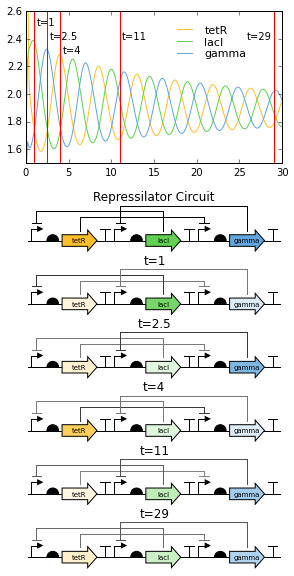

In [389]:
t = np.arange(0, 30.1, 0.1)
ymtet, ymlac, ymgamma, ytet, ylac, ygamma = zip(*odeint(repressilator, initial, t))

#tetr is orange [1.00, 0.75, 0.17]
#lacI is green [0.38, 0.82, 0.32]
#gamma is blue [0.38, 0.65, 0.87]
plac = {'name':'P_lac', 'start':1, 'end':10, 'type':'Promoter'}
rbs1 = {'name':'RBS', 'start':11, 'end':20, 'type':'RBS', 'opts':{'color':[0.0, 0.0, 0.0]}}
tetr = {'name':'tetR', 'start':21, 'end':40, 'type':'CDS', 'opts':{'label': 'tetR', 'color':[1.00, 0.75, 0.17]}}
term1 = {'name':'Term', 'start':41, 'end':55, 'type':'Terminator'}
pgamma = {'name':'P_gamma', 'start':56, 'end':65, 'type':'Promoter'}
rbs2 = {'name':'RBS', 'start':66, 'end':75, 'type':'RBS', 'opts':{'color':[0.0, 0.0, 0.0]}}
laci = {'name':'lacI', 'start':76, 'end':95, 'type':'CDS', 'opts':{'label': 'lacI', 'color':[0.38, 0.82, 0.32]}}
term2 = {'name':'Term', 'start':96, 'end':110, 'type':'Terminator'}
ptet = {'name':'P_tet', 'start':111, 'end':120, 'type':'Promoter'}
rbs3 = {'name':'RBS', 'start':121, 'end':130, 'type':'RBS', 'opts':{'color':[0.0, 0.0, 0.0]}}
gamma = {'name':'gamma', 'start':131, 'end':150, 'type':'CDS', 'opts':{'label': 'gamma', 'color':[0.38, 0.65, 0.87]}}
term3 = {'name':'Term', 'start':151, 'end':165, 'type':'Terminator'}

lac_repress = {'from_part':laci, 'to_part':plac, 'type':'Repression', 'opts':{'lw':2, 'color':[0, 0, 0]}}
gamma_repress = {'from_part':gamma, 'to_part':pgamma, 'type':'Repression', 'opts':{'lw':2, 'color':[0, 0, 0]}}
tet_repress = {'from_part':tetr, 'to_part':ptet, 'type':'Repression', 'opts':{'lw':2, 'color':[0, 0, 0]}}

plt.close()
plt.figure(figsize=(4, 8))
gs = gridspec.GridSpec(8, 1, height_ratios=[2.5, 0.5, 1, 1, 1, 1, 1, 1])
plt.subplot(gs[0])
plt.plot(t, ytet, color=[1.00, 0.75, 0.17])
plt.plot(t, ylac, color=[0.38, 0.82, 0.32])
plt.plot(t, ygamma, color=[0.38, 0.65, 0.87])
plt.axvline(x=1, color='r')
plt.text(1.3, 2.5, 't=1')
plt.axvline(x=2.5, color='r')
plt.text(2.8, 2.4, 't=2.5')
plt.axvline(x=4, color='r')
plt.text(4.3, 2.3, 't=4')
plt.axvline(x=11, color='r')
plt.text(11.3, 2.4, 't=11')
plt.axvline(x=29, color='r')
plt.text(25.9, 2.4, 't=29')
plt.ylim([1.5, 2.6])
plt.legend(['tetR', 'lacI', 'gamma'], frameon=False, fontsize=11, labelspacing=0.15, loc=(0.56,0.66))

ax = plt.subplot(gs[2])
ax.set_title('Repressilator Circuit')
dnaplotlib.plot_sbol_designs([ax], [[plac, rbs1, tetr, term1, pgamma, rbs2, laci, term2, ptet, rbs3, gamma, term3]],
            [[lac_repress, gamma_repress, tet_repress]])
ax.set_ylim([-10, 30])


t = 1
tind = int(t*10)
ax = plt.subplot(gs[3])
ax.set_title('t={}'.format(t))
tetr['opts']['color'] = [rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (1.0, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.75, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.17, 1.0))]
laci['opts']['color'] = [rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.82, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.32, 1.0))]
gamma['opts']['color'] = [rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.65, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.87, 1.0))]
lac_repress['opts']['color'] = [1 - repression(ylac[tind], 1.7, 4)]*3
gamma_repress['opts']['color'] = [1 - repression(ygamma[tind], 1.7, 4)]*3
tet_repress['opts']['color'] = [1 - repression(ytet[tind], 1.7, 4)]*3
dnaplotlib.plot_sbol_designs([ax], [[plac, rbs1, tetr, term1, pgamma, rbs2, laci, term2, ptet, rbs3, gamma, term3]],
            [[lac_repress, gamma_repress, tet_repress]])
ax.set_ylim([-10, 30])


t = 2.5
tind = int(t*10)
ax = plt.subplot(gs[4])
ax.set_title('t={}'.format(t))
tetr['opts']['color'] = [rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (1.0, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.75, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.17, 1.0))]
laci['opts']['color'] = [rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.82, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.32, 1.0))]
gamma['opts']['color'] = [rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.65, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.87, 1.0))]
lac_repress['opts']['color'] = [1 - repression(ylac[tind], 1.7, 4)]*3
gamma_repress['opts']['color'] = [1 - repression(ygamma[tind], 1.7, 4)]*3
tet_repress['opts']['color'] = [1 - repression(ytet[tind], 1.7, 4)]*3
dnaplotlib.plot_sbol_designs([ax], [[plac, rbs1, tetr, term1, pgamma, rbs2, laci, term2, ptet, rbs3, gamma, term3]],
            [[lac_repress, gamma_repress, tet_repress]])
ax.set_ylim([-10, 30])


t = 4
tind = int(t*10)
ax = plt.subplot(gs[5])
ax.set_title('t={}'.format(t))
tetr['opts']['color'] = [rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (1.0, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.75, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.17, 1.0))]
laci['opts']['color'] = [rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.82, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.32, 1.0))]
gamma['opts']['color'] = [rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.65, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.87, 1.0))]
lac_repress['opts']['color'] = [1 - repression(ylac[tind], 1.7, 4)]*3
gamma_repress['opts']['color'] = [1 - repression(ygamma[tind], 1.7, 4)]*3
tet_repress['opts']['color'] = [1 - repression(ytet[tind], 1.7, 4)]*3
dnaplotlib.plot_sbol_designs([ax], [[plac, rbs1, tetr, term1, pgamma, rbs2, laci, term2, ptet, rbs3, gamma, term3]],
            [[lac_repress, gamma_repress, tet_repress]])
ax.set_ylim([-10, 30])


t = 11
tind = int(t*10)
ax = plt.subplot(gs[6])
ax.set_title('t={}'.format(t))
tetr['opts']['color'] = [rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (1.0, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.75, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.17, 1.0))]
laci['opts']['color'] = [rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.82, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.32, 1.0))]
gamma['opts']['color'] = [rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.65, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.87, 1.0))]
lac_repress['opts']['color'] = [1 - repression(ylac[tind], 1.7, 4)]*3
gamma_repress['opts']['color'] = [1 - repression(ygamma[tind], 1.7, 4)]*3
tet_repress['opts']['color'] = [1 - repression(ytet[tind], 1.7, 4)]*3
dnaplotlib.plot_sbol_designs([ax], [[plac, rbs1, tetr, term1, pgamma, rbs2, laci, term2, ptet, rbs3, gamma, term3]],
            [[lac_repress, gamma_repress, tet_repress]])
ax.set_ylim([-10, 30])


t = 29
tind = int(t*10)
ax = plt.subplot(gs[7])
ax.set_title('t={}'.format(t))
tetr['opts']['color'] = [rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (1.0, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.75, 1.0)),
                            rescale(1 - expression(ymtet[tind], (1.55, 2.5)), (0.17, 1.0))]
laci['opts']['color'] = [rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.82, 1.0)),
                            rescale(1 - expression(ymlac[tind], (1.55, 2.5)), (0.32, 1.0))]
gamma['opts']['color'] = [rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.38, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.65, 1.0)),
                            rescale(1 - expression(ymgamma[tind], (1.55, 2.5)), (0.87, 1.0))]
lac_repress['opts']['color'] = [1 - repression(ylac[tind], 1.7, 4)]*3
gamma_repress['opts']['color'] = [1 - repression(ygamma[tind], 1.7, 4)]*3
tet_repress['opts']['color'] = [1 - repression(ytet[tind], 1.7, 4)]*3
dnaplotlib.plot_sbol_designs([ax], [[plac, rbs1, tetr, term1, pgamma, rbs2, laci, term2, ptet, rbs3, gamma, term3]],
            [[lac_repress, gamma_repress, tet_repress]])
ax.set_ylim([-10, 30])

plt.subplots_adjust(hspace=0.04, left=0.1, right=0.99, top=0.99, bottom=0.01)